In [2]:
# IMPORTS
from vanilla_option import vanilla_option
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.style.use('ggplot')


# INPUTS
S = 100
K = 100
T = 1/12
r = 0.01
q = 0
sd = 0.15

# Basic Gamma Shapes

Let's start by simply looking as the basic shape of gamma depending on the price of the underlying (S).

In its most basic form, the put-call parity states that:

<center> $ C + PV(K) = P + S$ </center>

Where:
- C = Price of a call option with strike K and T time to maturity.
- P = Price of a put option with strike K and T time to maturity.
- PV(K) = Present value of the strike price K discounted at the rate r.
- S = Spot price of the underlying (eventually discounted for its yield q).

Taking the first derivative with respect to S, the put-call parity gives the following relationship between the delta of a call and a put:
<center> $ \Delta_{C} = \Delta_{P} +1 $ </center>

Taking the first derivative of the relationship above (or the second order derivative of the put-call parity equation), it is immediately proven that the gamma of a call and a put coincide (ceteris paribus).
<center> $ \Gamma_{C} = \Gamma_{P} $ </center>

The gamma measures the rate of change of the delta as the spot price changes. Therefore, from the basic shape of delta it is easy to see that gamma is at its highest when the options is (approximately) At-The-Money (ATM) and the delta is around 0.5. In such segment of the line, the tangent line is the steepest.


(-0.01, 1.01)

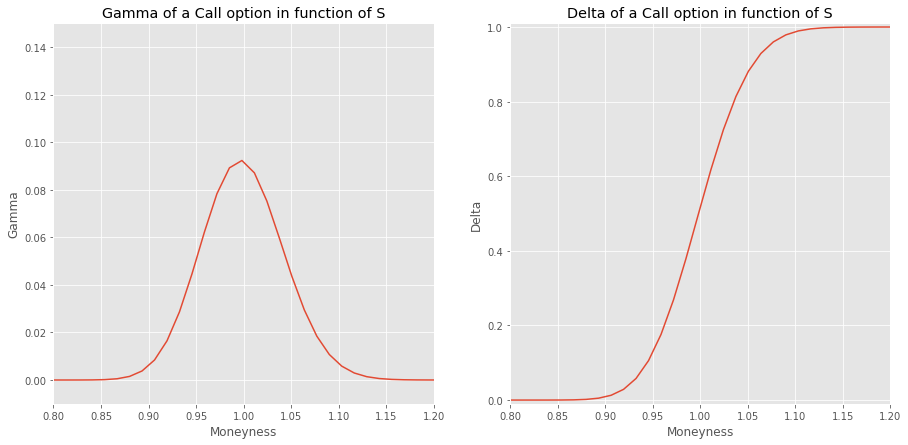

In [2]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 7] 


# Obtain list of spots and moneyness for plotting
spots = list(np.linspace(start = 0.07, stop = 1.3*S, num = 100))
moneyness = [spot / K for spot in spots]


### Gamma shape of a Call
option_type = 'Call'
plt.subplot(1, 2, 1)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, sd, option_type).bs_gamma() for spot in spots])
plt.xlabel('Moneyness')
plt.ylabel('Gamma')
plt.title('Gamma of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S')
plt.xlim(left=0.8, right=1.2)
plt.ylim(bottom=-0.01, top=0.15)


### Delta shape of a Call
option_type = 'Call'
plt.subplot(1, 2, 2)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, sd, option_type).bs_delta() for spot in spots])
plt.xlabel('Moneyness')
plt.ylabel('Delta')
plt.title('Delta of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S')
plt.xlim(left=0.8, right =1.2)
plt.ylim(bottom=-0.01, top=1.01)


# Effects of Volatility and Time on Gamma


### Effect of Volatility
When options are In-The-Money (ITM) or Out-of-The-Money (OTM), the higher the volatility and the higher the gamma. On the other hand, when options are At-The-Money, the higher the volatility and the lower the gamma. 
- When an option is (deeply) ITM or OTM, its price either changes very similarly to the price of the underlying (if ITM) or it barely changes (if OTM). If volatility is low, it is unlikely that the option will move away from its moneyness and varying its rate of change. Therefore, gamma is low because the delta is unlike to change. However, a higher volatility implies more probability for the option to move closer to being ATM and having a different degree of change compared to the underyling. This means that the delta may change more, meaning a higher gamma.
- The situation is different when an option is ATM. When At-The-Money, the delta of a call (put) is approximately 0.5 (-0.5). The option may move ITM and start behaving more as the underlying or falling OTM and slow down changing as the underlying changes. If volatility is low, the option is more likely to stay around ATM where delta experiences higher changes as the option gets ITM or OTM. The change in delta is relatively big and gamma is therefore large. On the other hand, if volatility is high it is more likely that the option may fall further ITM or OTM where the change in delta gets lower as the spot changes. This implies that gamma is lower.

To sum up the intuitive take:

|   OTM/ITM Options   |   ATM Options   |
|---|---|
|Higher volatility -> Higher gamma|Higher volatility -> Lower gamma|
|Lower volatility -> Lower gamma|Lower volatility -> Higher gamma|


### Effect of Time

When options are In-The-Money (ITM) or Out-of-The-Money (OTM), the higher the time to maturity and the higher the gamma. On the other hand, when options are At-The-Money, the higher the time to maturity and the lower the gamma. 
- When an option is (deeply) ITM or OTM, its price either changes very similarly to the price of the underlying (if ITM) or it barely changes (if OTM). If the option is close to expirying, it is unlikely that the option will move away from its moneyness and varying its rate of change. Therefore, gamma is low because the delta is unlike to change. However, a longer time to maturity implies more probability for the option to move closer to being ATM and having a different degree of change compared to the underyling. This means that the delta may change more, meaning a higher gamma.
- When At-The-Money, if the option is close to expiration, it is more likely to stay around ATM where delta experiences higher changes as the option gets ITM or OTM. The change in delta is relatively big and gamma is therefore large. On the other hand, if there is more time to maturity, it is more likely that the option may fall further ITM or OTM where the change in delta gets lower as the spot changes. This implies that gamma is lower.

To sum up the intuitive take:

|   OTM/ITM Options   |   ATM Options   |
|---|---|
|Higher time to maturity -> Higher gamma|Higher time to maturity -> Lower gamma|
|Lower time to maturity -> Lower gamma|Lower time to maturity -> Higher gamma|

(0.8, 1.2)

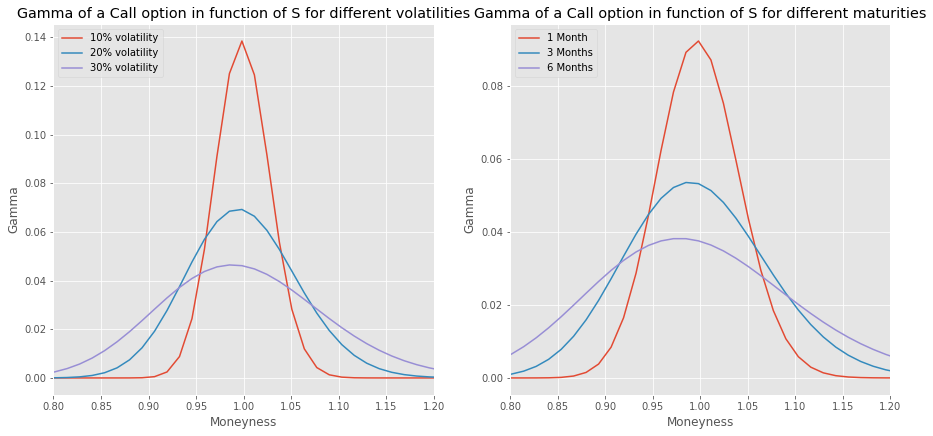

In [3]:
# Adjust size of output
plt.rcParams['figure.figsize'] = [15, 15] 


# Obtain list of spots and moneyness for plotting
spots = list(np.linspace(start = 0.07, stop = 1.3*S, num = 100))
moneyness = [spot / K for spot in spots]


### Delta shape of a Call as time passes and volatility changes
option_type = 'Call'

plt.subplot(2, 2, 1)
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.1, option_type).bs_gamma() for spot in spots], label = '10% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.2, option_type).bs_gamma() for spot in spots], label = '20% volatility')
plt.plot(moneyness, [vanilla_option(spot, K, T, r, q, 0.3, option_type).bs_gamma() for spot in spots], label = '30% volatility')
plt.xlabel('Moneyness')
plt.ylabel('Gamma')
plt.legend(loc = 'upper left')
plt.title('Gamma of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different volatilities')
plt.xlim(left=0.8, right =1.2)


plt.subplot(2, 2, 2)
plt.plot(moneyness, [vanilla_option(spot, K, 1/12, r, q, sd, option_type).bs_gamma() for spot in spots], label = '1 Month')
plt.plot(moneyness, [vanilla_option(spot, K, 3/12, r, q, sd, option_type).bs_gamma() for spot in spots], label = '3 Months')
plt.plot(moneyness, [vanilla_option(spot, K, 6/12, r, q, sd, option_type).bs_gamma() for spot in spots], label = '6 Months')
plt.xlabel('Moneyness')
plt.ylabel('Gamma')
plt.legend(loc = 'upper left')
plt.title('Gamma of a ' + vanilla_option(S, K, T, r, q, sd, option_type).option_type + ' option in function of S for different maturities')
plt.xlim(left=0.8, right =1.2)
